Things to consider

- XGBoost
- Feature engineering

In [ ]:
!pip install prince
#!pip install impyute
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import prince
#import impyute

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sqf_2015 = pd.read_csv('/content/drive/My Drive/AML Final Project/data/sqf/sqf-2015.csv')
sqf_2016 = pd.read_csv('/content/drive/My Drive/AML Final Project/data/sqf/sqf-2016.csv')
sqf_2017 = pd.read_excel('/content/drive/My Drive/AML Final Project/data/sqf/sqf_2017.xlsx')
sqf_2018 = pd.read_excel('/content/drive/My Drive/AML Final Project/data/sqf/sqf-2018.xlsx')
sqf_2019 = pd.read_excel('/content/drive/My Drive/AML Final Project/data/sqf/sqf-2019.xlsx')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,8,18,19,73,74,84,85,86,103,110,111) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print('sqf_2015 shape', sqf_2015.shape)
print('sqf_2016 shape', sqf_2016.shape)
print('sqf_2017 shape', sqf_2017.shape)
print('sqf_2018 shape', sqf_2018.shape)
print('sqf_2019 shape', sqf_2019.shape)

sqf_2015 shape (22563, 112)
sqf_2016 shape (12405, 112)
sqf_2017 shape (11629, 83)
sqf_2018 shape (11008, 83)
sqf_2019 shape (13459, 83)


In [ ]:
sqf_2019.columns == sqf_2018.columns

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True])

In [ ]:
sqf_2018 = sqf_2018.rename(columns={'Stop Frisk Time': 'STOP_FRISK_TIME'})
sqf_2019 = sqf_2019.rename(columns={'Stop Frisk Time': 'STOP_FRISK_TIME'})

In [ ]:
sqf_2019.columns == sqf_2017.columns

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True])

In [ ]:
sqf_2015['radio'].value_counts()

N    13175
Y     9388
Name: radio, dtype: int64

In [ ]:
sqf_2017['STOP_WAS_INITIATED'].value_counts()

Based on Radio Run         6566
Based on Self Initiated    3437
Based on C/W on Scene      1612
(null)                       13
Name: STOP_WAS_INITIATED, dtype: int64

In [ ]:
cols_to_keep_old = ['year', 'pct', 'datestop', 'timestop', 'inout', 'trhsloc', 'perobs', 'crimsusp', 'perstop', 'offunif', 'frisked', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap', 'radio', 'sex', 
                    'race', 'age', 'ht_feet', 'ht_inch', 'weight', 'build']

cols_to_keep_new = ['STOP_FRISK_TIME', 'YEAR2', 'MONTH2', 'DAY2', 'LOCATION_IN_OUT_CODE', 'JURISDICTION_CODE', 'OBSERVED_DURATION_MINUTES', 'SUSPECTED_CRIME_DESCRIPTION', 'STOP_DURATION_MINUTES', 'STOP_WAS_INITIATED', 
                    'OFFICER_IN_UNIFORM_FLAG', 'FRISKED_FLAG', 'SUSPECT_REPORTED_AGE', 'SUSPECT_SEX', 'SUSPECT_RACE_DESCRIPTION', 'SUSPECT_HEIGHT', 'SUSPECT_WEIGHT', 'SUSPECT_BODY_BUILD_TYPE', 'STOP_LOCATION_PRECINCT', 'WEAPON_FOUND_FLAG']

In [ ]:
sqf_2015 = sqf_2015[sqf_2015.columns[sqf_2015.columns.isin(cols_to_keep_old)]]
sqf_2016 = sqf_2016[sqf_2016.columns[sqf_2016.columns.isin(cols_to_keep_old)]]
sqf_2017 = sqf_2017[sqf_2017.columns[sqf_2017.columns.isin(cols_to_keep_new)]]
sqf_2018 = sqf_2018[sqf_2018.columns[sqf_2018.columns.isin(cols_to_keep_new)]]
sqf_2019 = sqf_2019[sqf_2019.columns[sqf_2019.columns.isin(cols_to_keep_new)]]

In [ ]:
frames_old = [sqf_2015, sqf_2016]
sqf_old = pd.concat(frames_old)

In [ ]:
sqf_old['pistol'] = sqf_old['pistol'].apply(lambda x: 1 if x == 'Y' else 0)
sqf_old['riflshot'] = sqf_old['riflshot'].apply(lambda x: 1 if x == 'Y' else 0)
sqf_old['asltweap'] = sqf_old['asltweap'].apply(lambda x: 1 if x == 'Y' else 0)
sqf_old['knifcuti'] = sqf_old['knifcuti'].apply(lambda x: 1 if x == 'Y' else 0)
sqf_old['machgun'] = sqf_old['machgun'].apply(lambda x: 1 if x == 'Y' else 0)
sqf_old['othrweap'] = sqf_old['othrweap'].apply(lambda x: 1 if x == 'Y' else 0)

sqf_old['WEAPON_FOUND_FLAG'] = sqf_old['pistol'] + sqf_old['riflshot'] + sqf_old['asltweap'] + sqf_old['knifcuti'] + sqf_old['machgun'] + sqf_old['othrweap']

In [ ]:
sqf_old['ht_feet'] = sqf_old['ht_feet'].replace(" ", np.nan, regex=True)
sqf_old['ht_inch'] = sqf_old['ht_inch'].replace(" ", np.nan, regex=True)
sqf_old['SUSPECT_HEIGHT'] = pd.to_numeric(sqf_old['ht_feet']) + pd.to_numeric(sqf_old['ht_inch'].astype(float))/12

In [ ]:
sqf_old['datestop'] = sqf_old['datestop'].replace(" ", np.nan, regex=True)
sqf_old['timestop'] = sqf_old['timestop'].replace(" ", np.nan, regex=True)

In [ ]:
sqf_old.drop(['pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap', 'ht_feet', 'ht_inch'], axis=1, inplace=True)

In [ ]:
import datetime
def get_month(datetime_bad):
  if datetime_bad is np.nan:
    return np.nan
  #print(datetime_bad)
  string = str(datetime_bad)
  year = int(string[-4:])
  month = int(string[-6:-4] if len(string) == 8 else string[-5])
  day = int(string[0:2])
  if (month == 0):
    month = 1
  if (month > 12):
    month = 12  
  if ((month == 4 or month == 6 or month == 9 or month == 11) and day > 30):
    day = 30
  if (month == 2 and day > 28):
    day = 28
  if ((month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12) and day > 31):
    day = 30
  return month

def get_day(datetime_bad):
  if datetime_bad is np.nan:
    return np.nan
  string = str(datetime_bad)
  year = int(string[-4:])
  month = int(string[-6:-4] if len(string) == 8 else string[-5])
  day = int(string[0:2])
  if (month == 0):
    month = 1 
  if (month > 12):
    month = 12 
  if ((month == 4 or month == 6 or month == 9 or month == 11) and day > 30):
    day = 30
  if (month == 2 and day > 28):
    day = 28
  if ((month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12) and day > 31):
    day = 30
  date = datetime.datetime(year, month, day)
  dow = date.weekday()
  return dow

In [ ]:
sqf_old['MONTH2'] = sqf_old['datestop'].apply(lambda x: get_month(x))
sqf_old['DAY2'] = sqf_old['datestop'].apply(lambda x: get_day(x))

In [ ]:
sqf_old.drop(['datestop'], axis=1, inplace=True)

In [ ]:
def get_time(timestop):
  if timestop is np.nan:
    return np.nan
  string = str(timestop)
  min = int(string[-2:])
  hr = int(string[0:2] if len(string) == 2 else string[0])
  return (hr + min/60)

In [ ]:
sqf_old['STOP_FRISK_TIME'] = sqf_old['timestop'].apply(lambda x: get_time(x))

In [ ]:
sqf_old.drop(['timestop'], axis=1, inplace=True)

In [ ]:
sqf_old = sqf_old.rename({'year': 'YEAR2', 'pct': 'STOP_LOCATION_PRECINCT', 'inout': 'LOCATION_IN_OUT_CODE', 'trhsloc': 'JURISDICTION_CODE', 'perobs': 'OBSERVED_DURATION_MINUTES', 'offunif': 'OFFICER_IN_UNIFORM_FLAG', 'frisked': 'FRISKED_FLAG', 
                          'radio': 'STOP_WAS_INITIATED', 'sex': 'SUSPECT_SEX', 'race': 'SUSPECT_RACE_DESCRIPTION', 'age': 'SUSPECT_REPORTED_AGE', 'weight': 'SUSPECT_WEIGHT', 'build': 'SUSPECT_BODY_BUILD_TYPE', 'perstop': 'STOP_DURATION_MINUTES',
                          'crimsusp': 'SUSPECTED_CRIME_DESCRIPTION'}, axis=1)

In [ ]:
#sqf_old

In [ ]:
frames_new = [sqf_2017, sqf_2018, sqf_2019]
sqf_new = pd.concat(frames_new)

In [ ]:
sqf_new['JURISDICTION_CODE'] = sqf_new['JURISDICTION_CODE'].replace('(', np.nan)
sqf_new['STOP_WAS_INITIATED'] = sqf_new['STOP_WAS_INITIATED'].apply(lambda x: 'Y' if x == 'Based on Radio Run' else 'N')
sqf_new['SUSPECT_SEX'] = sqf_new['SUSPECT_SEX'].apply(lambda x: 'M' if x == 'MALE' else ('F' if x == 'FEMALE' else np.nan))
sqf_new['SUSPECT_BODY_BUILD_TYPE'] = sqf_new['SUSPECT_BODY_BUILD_TYPE'].replace({'THN': 'T', 'MED': 'M', 'HEA': 'H'})
sqf_new['SUSPECT_BODY_BUILD_TYPE'] = sqf_new['SUSPECT_BODY_BUILD_TYPE'].apply(lambda x: np.nan if x not in ['M', 'T', 'H', 'U'] else x)
sqf_new['WEAPON_FOUND_FLAG'] = sqf_new['WEAPON_FOUND_FLAG'].replace({'N': 0, 'Y': 1, '(': np.nan})
sqf_old['WEAPON_FOUND_FLAG'] = sqf_old['WEAPON_FOUND_FLAG'].replace({2: np.nan})
sqf_new['MONTH2'] = sqf_new['MONTH2'].replace({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})
sqf_new['DAY2'] = sqf_new['DAY2'].replace({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6})

In [ ]:
sqf_new = sqf_new.dropna(subset=['STOP_FRISK_TIME'])
sqf_new['STOP_FRISK_TIME'] = sqf_new['STOP_FRISK_TIME'].apply(lambda x: x.hour + x.minute/60)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sqf_old['SUSPECT_RACE_DESCRIPTION'] = sqf_old['SUSPECT_RACE_DESCRIPTION'].replace({'B': 'BLACK', 'Q': 'HISPANIC', 'A': 'ASIAN', 'P': 'HISPANIC', 'W': 'WHITE', 'I': 'AMERICAN INDIAN'})
sqf_new['SUSPECT_RACE_DESCRIPTION'] = sqf_new['SUSPECT_RACE_DESCRIPTION'].replace({'ASIAN / PACIFIC ISLANDER': 'ASIAN', 'ASIAN/PAC.ISL': 'ASIAN', 'AMERICAN INDIAN/ALASKAN NATIVE': 'AMERICAN INDIAN', 
                                                                                   'AMER IND': 'AMERICAN INDIAN', 'AMERICAN INDIAN/ALASKAN N': 'AMERICAN INDIAN', 'MALE': 'U', 
                                                                                   'WHITE HISPANIC': 'HISPANIC', 'BLACK HISPANIC': 'HISPANIC'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
sqf = pd.concat([sqf_old, sqf_new], ignore_index=True)

In [ ]:
sqf.shape

(71057, 20)

In [ ]:
sqf_cpw = sqf[sqf['SUSPECTED_CRIME_DESCRIPTION'] == 'CPW']
sqf_cpw = sqf_cpw.drop('SUSPECTED_CRIME_DESCRIPTION', 1)

In [ ]:
sqf_cpw = sqf_cpw[sqf_cpw['SUSPECT_RACE_DESCRIPTION'].isin(['BLACK', 'WHITE', 'HISPANIC', 'ASIAN'])]

In [ ]:
sqf_cpw.shape

(13189, 19)

In [ ]:
sqf_cpw['SUSPECT_RACE_DESCRIPTION'].value_counts()

BLACK       8503
HISPANIC    3800
WHITE        689
ASIAN        197
Name: SUSPECT_RACE_DESCRIPTION, dtype: int64

In [ ]:
sqf_cpw.sample(7)

,YEAR2,STOP_LOCATION_PRECINCT,LOCATION_IN_OUT_CODE,JURISDICTION_CODE,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,STOP_WAS_INITIATED,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_REPORTED_AGE,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,WEAPON_FOUND_FLAG,SUSPECT_HEIGHT,MONTH2,DAY2,STOP_FRISK_TIME
66959,2019,79,(null),(null),1,1,N,Y,N,M,HISPANIC,25,210,M,0.0,5.1,2.0,3.0,14.450000
63394,2019,50,I,P,1,1,N,Y,N,M,HISPANIC,16,90,T,1.0,5.3,7.0,0.0,16.350000
56850,2018,73,I,P,3,5,N,Y,N,M,BLACK,30,240,H,0.0,5.8,12.0,5.0,17.133333
67035,2019,79,O,H,1,5,Y,Y,Y,M,BLACK,33,180,M,0.0,5.1,5.0,2.0,16.900000
45477,2017,113,O,P,1,15,N,Y,N,M,HISPANIC,19,140,T,0.0,5.7,7.0,5.0,18.000000
31603,2016,75,O,H,1.00,5,Y,Y,Y,M,BLACK,30,150,T,0.0,5.83333,6.0,3.0,1.483333
39962,2017,49,(null),P,1,8,Y,Y,Y,M,HISPANIC,14,140,T,1.0,5.11,4.0,1.0,20.100000


In [ ]:
sqf_cpw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13189 entries, 34 to 71042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YEAR2                      13189 non-null  object 
 1   STOP_LOCATION_PRECINCT     13046 non-null  object 
 2   LOCATION_IN_OUT_CODE       13189 non-null  object 
 3   JURISDICTION_CODE          13189 non-null  object 
 4   OBSERVED_DURATION_MINUTES  13189 non-null  object 
 5   STOP_DURATION_MINUTES      13189 non-null  object 
 6   OFFICER_IN_UNIFORM_FLAG    13189 non-null  object 
 7   FRISKED_FLAG               13189 non-null  object 
 8   STOP_WAS_INITIATED         13189 non-null  object 
 9   SUSPECT_SEX                13156 non-null  object 
 10  SUSPECT_RACE_DESCRIPTION   13189 non-null  object 
 11  SUSPECT_REPORTED_AGE       13189 non-null  object 
 12  SUSPECT_WEIGHT             13189 non-null  object 
 13  SUSPECT_BODY_BUILD_TYPE    13038 non-null  ob

In [ ]:
sqf_cpw_filter = sqf_cpw.dropna(subset=['STOP_LOCATION_PRECINCT', 'WEAPON_FOUND_FLAG'], axis=0)

In [ ]:
sqf_cpw_filter['OBSERVED_DURATION_MINUTES'] = sqf_cpw_filter['OBSERVED_DURATION_MINUTES'].apply(lambda x: 30 if float(x) > 30 else float(x))
sqf_cpw_filter['LOCATION_IN_OUT_CODE'] = sqf_cpw_filter['LOCATION_IN_OUT_CODE'].replace({'(null)': np.nan})
sqf_cpw_filter['JURISDICTION_CODE'] = sqf_cpw_filter['JURISDICTION_CODE'].replace({'(null)': np.nan})
sqf_cpw_filter['SUSPECT_REPORTED_AGE'] = sqf_cpw_filter['SUSPECT_REPORTED_AGE'].replace({'(null)': np.nan})
sqf_cpw_filter['SUSPECT_REPORTED_AGE'] = sqf_cpw_filter['SUSPECT_REPORTED_AGE'].replace({'**': np.nan})
sqf_cpw_filter['SUSPECT_WEIGHT'] = sqf_cpw_filter['SUSPECT_WEIGHT'].replace({'(null)': np.nan})
sqf_cpw_filter['SUSPECT_WEIGHT'] = sqf_cpw_filter['SUSPECT_WEIGHT'].replace({'**': np.nan})
sqf_cpw_filter['SUSPECT_HEIGHT'] = sqf_cpw_filter['SUSPECT_HEIGHT'].replace({'(null)': np.nan})
sqf_cpw_filter['SUSPECT_HEIGHT'] = sqf_cpw_filter['SUSPECT_HEIGHT'].replace({'**': np.nan})
sqf_cpw_filter['SUSPECT_HEIGHT'] = sqf_cpw_filter['SUSPECT_HEIGHT'].replace({' ': np.nan})
sqf_cpw_filter['SUSPECT_WEIGHT'] = sqf_cpw_filter['SUSPECT_WEIGHT'].replace({' ': np.nan})
sqf_cpw_filter['STOP_DURATION_MINUTES'] = sqf_cpw_filter['STOP_DURATION_MINUTES'].replace({'**': np.nan})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#pd.set_option("display.max_rows", None)
sqf_cpw_filter['SUSPECT_HEIGHT'].isnull().sum()

332

In [ ]:
# To impute: LOCATION_IN_OUT_CODE, JURISDICTION_CODE, SUSPECT_RACE_DESCRIPTION, SUSPECT_HEIGHT, SUSPECT_WEIGHT, SUSPECT_SEX, SUSPECT_REPORTED_AGE

**Imputation for all missing values**

Need to impute: LOCATION_IN_OUT_CODE, JURISDICTION_CODE, SUSPECT_RACE_DESCRIPTION, SUSPECT_HEIGHT, SUSPECT_WEIGHT, SUSPECT_SEX, suspect_reported_age

Steps:


1.   One hot encode for all categorical variables in sqf_cpw_filter
2. Run the iterative imputer on sqf_ohe.


In [ ]:
# OHE

sqf_ohe = pd.get_dummies(sqf_cpw_filter, drop_first=True, columns=['YEAR2', 'STOP_LOCATION_PRECINCT', 'LOCATION_IN_OUT_CODE', 'OFFICER_IN_UNIFORM_FLAG', 'FRISKED_FLAG', 'STOP_WAS_INITIATED', 
                                   'JURISDICTION_CODE', 'SUSPECT_SEX', 'WEAPON_FOUND_FLAG', 'SUSPECT_RACE_DESCRIPTION', 'SUSPECT_BODY_BUILD_TYPE', 'MONTH2', 'DAY2'])

In [ ]:
# imputation (ascending order of missing values)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0)
imputed = imputer.fit_transform(sqf_ohe)
df_imputed = pd.DataFrame(imputed, columns=sqf_ohe.columns)

In [ ]:
df_imputed

,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,SUSPECT_REPORTED_AGE,SUSPECT_WEIGHT,SUSPECT_HEIGHT,STOP_FRISK_TIME,YEAR2_2016,YEAR2_2017,YEAR2_2018,YEAR2_2019,YEAR2_2016,STOP_LOCATION_PRECINCT_5,STOP_LOCATION_PRECINCT_6,STOP_LOCATION_PRECINCT_7.0,STOP_LOCATION_PRECINCT_9,STOP_LOCATION_PRECINCT_10,STOP_LOCATION_PRECINCT_13,STOP_LOCATION_PRECINCT_14.0,STOP_LOCATION_PRECINCT_17,STOP_LOCATION_PRECINCT_18,STOP_LOCATION_PRECINCT_19.0,STOP_LOCATION_PRECINCT_20,STOP_LOCATION_PRECINCT_22.0,STOP_LOCATION_PRECINCT_23,STOP_LOCATION_PRECINCT_24,STOP_LOCATION_PRECINCT_25,STOP_LOCATION_PRECINCT_26,STOP_LOCATION_PRECINCT_28,STOP_LOCATION_PRECINCT_30,STOP_LOCATION_PRECINCT_32,STOP_LOCATION_PRECINCT_33,STOP_LOCATION_PRECINCT_34,STOP_LOCATION_PRECINCT_40,STOP_LOCATION_PRECINCT_41,STOP_LOCATION_PRECINCT_42,STOP_LOCATION_PRECINCT_43,STOP_LOCATION_PRECINCT_44,STOP_LOCATION_PRECINCT_45.0,STOP_LOCATION_PRECINCT_46,STOP_LOCATION_PRECINCT_47,...,STOP_LOCATION_PRECINCT_78,STOP_LOCATION_PRECINCT_79,STOP_LOCATION_PRECINCT_81,STOP_LOCATION_PRECINCT_84,STOP_LOCATION_PRECINCT_88,LOCATION_IN_OUT_CODE_O,LOCATION_IN_OUT_CODE_S,OFFICER_IN_UNIFORM_FLAG_Y,FRISKED_FLAG_Y,STOP_WAS_INITIATED_Y,JURISDICTION_CODE_H,JURISDICTION_CODE_P,JURISDICTION_CODE_T,SUSPECT_SEX_M,SUSPECT_SEX_Z,WEAPON_FOUND_FLAG_1.0,SUSPECT_RACE_DESCRIPTION_BLACK,SUSPECT_RACE_DESCRIPTION_HISPANIC,SUSPECT_RACE_DESCRIPTION_WHITE,SUSPECT_BODY_BUILD_TYPE_M,SUSPECT_BODY_BUILD_TYPE_T,SUSPECT_BODY_BUILD_TYPE_U,SUSPECT_BODY_BUILD_TYPE_Z,MONTH2_2.0,MONTH2_3.0,MONTH2_4.0,MONTH2_5.0,MONTH2_6.0,MONTH2_7.0,MONTH2_8.0,MONTH2_9.0,MONTH2_10.0,MONTH2_11.0,MONTH2_12.0,DAY2_1.0,DAY2_2.0,DAY2_3.0,DAY2_4.0,DAY2_5.0,DAY2_6.0
0,1.0,5.0,42.0,150.0,5.083333,1.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,5.0,20.0,120.0,5.333333,1.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,5.0,48.0,325.0,5.916667,1.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,2.0,48.0,230.0,5.500000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,2.0,16.0,150.0,5.500000,2.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13026,1.0,5.0,18.0,150.0,5.900000,1.816667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1

Predicting Frisk

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_imputed, test_size=0.2, random_state=1)

train, val = train_test_split(train, test_size=0.25, random_state=1)

In [ ]:
train.shape

(7818, 158)

In [ ]:
test.shape

(2607, 158)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scale = scaler.fit_transform(train)

val_scale = scaler.transform(val)
test_scale = scaler.transform(test)

scaled_train = pd.DataFrame(train_scale, index=train.index, columns=train.columns)
scaled_val = pd.DataFrame(val_scale, index=val.index, columns=val.columns)
scaled_test = pd.DataFrame(test_scale, index=test.index, columns=test.columns)

scaled_train2 = scaled_train.drop(['FRISKED_FLAG_Y', 'WEAPON_FOUND_FLAG_1.0'], axis=1)
scaled_val2 = scaled_val.drop(['FRISKED_FLAG_Y', 'WEAPON_FOUND_FLAG_1.0'], axis=1)
scaled_test2 = scaled_test.drop(['FRISKED_FLAG_Y', 'WEAPON_FOUND_FLAG_1.0'], axis=1)

In [ ]:
targets_train = train['FRISKED_FLAG_Y']

In [ ]:
scaled_train2[scaled_train2.isna().any(axis=1)]


,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,SUSPECT_REPORTED_AGE,SUSPECT_WEIGHT,SUSPECT_HEIGHT,STOP_FRISK_TIME,YEAR2_2016,YEAR2_2017,YEAR2_2018,YEAR2_2019,YEAR2_2016,STOP_LOCATION_PRECINCT_5,STOP_LOCATION_PRECINCT_6,STOP_LOCATION_PRECINCT_7.0,STOP_LOCATION_PRECINCT_9,STOP_LOCATION_PRECINCT_10,STOP_LOCATION_PRECINCT_13,STOP_LOCATION_PRECINCT_14.0,STOP_LOCATION_PRECINCT_17,STOP_LOCATION_PRECINCT_18,STOP_LOCATION_PRECINCT_19.0,STOP_LOCATION_PRECINCT_20,STOP_LOCATION_PRECINCT_22.0,STOP_LOCATION_PRECINCT_23,STOP_LOCATION_PRECINCT_24,STOP_LOCATION_PRECINCT_25,STOP_LOCATION_PRECINCT_26,STOP_LOCATION_PRECINCT_28,STOP_LOCATION_PRECINCT_30,STOP_LOCATION_PRECINCT_32,STOP_LOCATION_PRECINCT_33,STOP_LOCATION_PRECINCT_34,STOP_LOCATION_PRECINCT_40,STOP_LOCATION_PRECINCT_41,STOP_LOCATION_PRECINCT_42,STOP_LOCATION_PRECINCT_43,STOP_LOCATION_PRECINCT_44,STOP_LOCATION_PRECINCT_45.0,STOP_LOCATION_PRECINCT_46,STOP_LOCATION_PRECINCT_47,...,STOP_LOCATION_PRECINCT_75,STOP_LOCATION_PRECINCT_77,STOP_LOCATION_PRECINCT_78,STOP_LOCATION_PRECINCT_79,STOP_LOCATION_PRECINCT_81,STOP_LOCATION_PRECINCT_84,STOP_LOCATION_PRECINCT_88,LOCATION_IN_OUT_CODE_O,LOCATION_IN_OUT_CODE_S,OFFICER_IN_UNIFORM_FLAG_Y,STOP_WAS_INITIATED_Y,JURISDICTION_CODE_H,JURISDICTION_CODE_P,JURISDICTION_CODE_T,SUSPECT_SEX_M,SUSPECT_SEX_Z,SUSPECT_RACE_DESCRIPTION_BLACK,SUSPECT_RACE_DESCRIPTION_HISPANIC,SUSPECT_RACE_DESCRIPTION_WHITE,SUSPECT_BODY_BUILD_TYPE_M,SUSPECT_BODY_BUILD_TYPE_T,SUSPECT_BODY_BUILD_TYPE_U,SUSPECT_BODY_BUILD_TYPE_Z,MONTH2_2.0,MONTH2_3.0,MONTH2_4.0,MONTH2_5.0,MONTH2_6.0,MONTH2_7.0,MONTH2_8.0,MONTH2_9.0,MONTH2_10.0,MONTH2_11.0,MONTH2_12.0,DAY2_1.0,DAY2_2.0,DAY2_3.0,DAY2_4.0,DAY2_5.0,DAY2_6.0


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l2', max_iter=1000)

logreg.fit(scaled_train2, targets_train)

y_train_pred = logreg.predict_proba(scaled_train2)

In [ ]:
from sklearn.metrics import roc_auc_score
print('The AUC score of my training set:')
roc_auc_score(targets_train, y_train_pred[:, 1])

The AUC score of my training set:


0.7206335645961062

In [ ]:
# AUC score for validation set

y_val_pred = logreg.predict_proba(scaled_val2)
val_targets = val['FRISKED_FLAG_Y']
roc_auc_score(val_targets, y_val_pred[:, 1])

0.6241616509028375

Predicting Found **Weapon**

In [ ]:
df_imputed_filtered_frisk = df_imputed[df_imputed['FRISKED_FLAG_Y'] == 1.0] # we want to filter out only the found weapon after the suspect is frisked

In [ ]:
df_imputed_filtered_frisk

,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,SUSPECT_REPORTED_AGE,SUSPECT_WEIGHT,SUSPECT_HEIGHT,STOP_FRISK_TIME,YEAR2_2016,YEAR2_2017,YEAR2_2018,YEAR2_2019,YEAR2_2016,STOP_LOCATION_PRECINCT_5,STOP_LOCATION_PRECINCT_6,STOP_LOCATION_PRECINCT_7.0,STOP_LOCATION_PRECINCT_9,STOP_LOCATION_PRECINCT_10,STOP_LOCATION_PRECINCT_13,STOP_LOCATION_PRECINCT_14.0,STOP_LOCATION_PRECINCT_17,STOP_LOCATION_PRECINCT_18,STOP_LOCATION_PRECINCT_19.0,STOP_LOCATION_PRECINCT_20,STOP_LOCATION_PRECINCT_22.0,STOP_LOCATION_PRECINCT_23,STOP_LOCATION_PRECINCT_24,STOP_LOCATION_PRECINCT_25,STOP_LOCATION_PRECINCT_26,STOP_LOCATION_PRECINCT_28,STOP_LOCATION_PRECINCT_30,STOP_LOCATION_PRECINCT_32,STOP_LOCATION_PRECINCT_33,STOP_LOCATION_PRECINCT_34,STOP_LOCATION_PRECINCT_40,STOP_LOCATION_PRECINCT_41,STOP_LOCATION_PRECINCT_42,STOP_LOCATION_PRECINCT_43,STOP_LOCATION_PRECINCT_44,STOP_LOCATION_PRECINCT_45.0,STOP_LOCATION_PRECINCT_46,STOP_LOCATION_PRECINCT_47,...,STOP_LOCATION_PRECINCT_78,STOP_LOCATION_PRECINCT_79,STOP_LOCATION_PRECINCT_81,STOP_LOCATION_PRECINCT_84,STOP_LOCATION_PRECINCT_88,LOCATION_IN_OUT_CODE_O,LOCATION_IN_OUT_CODE_S,OFFICER_IN_UNIFORM_FLAG_Y,FRISKED_FLAG_Y,STOP_WAS_INITIATED_Y,JURISDICTION_CODE_H,JURISDICTION_CODE_P,JURISDICTION_CODE_T,SUSPECT_SEX_M,SUSPECT_SEX_Z,WEAPON_FOUND_FLAG_1.0,SUSPECT_RACE_DESCRIPTION_BLACK,SUSPECT_RACE_DESCRIPTION_HISPANIC,SUSPECT_RACE_DESCRIPTION_WHITE,SUSPECT_BODY_BUILD_TYPE_M,SUSPECT_BODY_BUILD_TYPE_T,SUSPECT_BODY_BUILD_TYPE_U,SUSPECT_BODY_BUILD_TYPE_Z,MONTH2_2.0,MONTH2_3.0,MONTH2_4.0,MONTH2_5.0,MONTH2_6.0,MONTH2_7.0,MONTH2_8.0,MONTH2_9.0,MONTH2_10.0,MONTH2_11.0,MONTH2_12.0,DAY2_1.0,DAY2_2.0,DAY2_3.0,DAY2_4.0,DAY2_5.0,DAY2_6.0
1,1.0,5.0,20.0,120.0,5.333333,1.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,5.0,48.0,325.0,5.916667,1.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,2.0,48.0,230.0,5.500000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,2.0,16.0,150.0,5.500000,2.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,2.0,19.0,180.0,6.083333,2.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13026,1.0,5.0,18.0,150.0,5.900000,1.816667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1

In [ ]:
from sklearn.model_selection import train_test_split

train_w, test_w = train_test_split(df_imputed_filtered_frisk, test_size=0.2, random_state=1)

train_w, val_w = train_test_split(train_w, test_size=0.25, random_state=1)

In [ ]:
train_w.shape

(6984, 158)

In [ ]:
test_w.shape

(2328, 158)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_w = StandardScaler()
train_scale_w = scaler_w.fit_transform(train_w)

val_scale_w = scaler_w.transform(val_w)
test_scale_w = scaler_w.transform(test_w)

scaled_train_w = pd.DataFrame(train_scale_w, index=train_w.index, columns=train_w.columns)
scaled_val_w = pd.DataFrame(val_scale_w, index=val_w.index, columns=val_w.columns)
scaled_test_w = pd.DataFrame(test_scale_w, index=test_w.index, columns=test_w.columns)

scaled_train2_w = scaled_train_w.drop(['FRISKED_FLAG_Y', 'WEAPON_FOUND_FLAG_1.0'], axis=1)
scaled_val2_w = scaled_val_w.drop(['FRISKED_FLAG_Y', 'WEAPON_FOUND_FLAG_1.0'], axis=1)
scaled_test2_w = scaled_test_w.drop(['FRISKED_FLAG_Y', 'WEAPON_FOUND_FLAG_1.0'], axis=1)

In [ ]:
scaled_test2_w.shape

(2328, 156)

In [ ]:
targets_train_w = train_w['WEAPON_FOUND_FLAG_1.0']

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_w = LogisticRegression(penalty='l2', max_iter=1000)

logreg_w.fit(scaled_train2_w, targets_train_w)

y_train_pred_w = logreg_w.predict_proba(scaled_train2_w)

In [ ]:
from sklearn.metrics import roc_auc_score

print('The AUC score of my training set:')
roc_auc_score(targets_train_w, y_train_pred_w[:, 1])

The AUC score of my training set:


0.7226864685434896

In [ ]:
# AUC score for validation set

y_val_pred_w = logreg_w.predict_proba(scaled_val2_w)
val_targets_w = val_w['WEAPON_FOUND_FLAG_1.0']
roc_auc_score(val_targets_w, y_val_pred_w[:, 1])

0.6996627416056469

In [ ]:
scaled_train2_w

,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,SUSPECT_REPORTED_AGE,SUSPECT_WEIGHT,SUSPECT_HEIGHT,STOP_FRISK_TIME,YEAR2_2016,YEAR2_2017,YEAR2_2018,YEAR2_2019,YEAR2_2016,STOP_LOCATION_PRECINCT_5,STOP_LOCATION_PRECINCT_6,STOP_LOCATION_PRECINCT_7.0,STOP_LOCATION_PRECINCT_9,STOP_LOCATION_PRECINCT_10,STOP_LOCATION_PRECINCT_13,STOP_LOCATION_PRECINCT_14.0,STOP_LOCATION_PRECINCT_17,STOP_LOCATION_PRECINCT_18,STOP_LOCATION_PRECINCT_19.0,STOP_LOCATION_PRECINCT_20,STOP_LOCATION_PRECINCT_22.0,STOP_LOCATION_PRECINCT_23,STOP_LOCATION_PRECINCT_24,STOP_LOCATION_PRECINCT_25,STOP_LOCATION_PRECINCT_26,STOP_LOCATION_PRECINCT_28,STOP_LOCATION_PRECINCT_30,STOP_LOCATION_PRECINCT_32,STOP_LOCATION_PRECINCT_33,STOP_LOCATION_PRECINCT_34,STOP_LOCATION_PRECINCT_40,STOP_LOCATION_PRECINCT_41,STOP_LOCATION_PRECINCT_42,STOP_LOCATION_PRECINCT_43,STOP_LOCATION_PRECINCT_44,STOP_LOCATION_PRECINCT_45.0,STOP_LOCATION_PRECINCT_46,STOP_LOCATION_PRECINCT_47,...,STOP_LOCATION_PRECINCT_75,STOP_LOCATION_PRECINCT_77,STOP_LOCATION_PRECINCT_78,STOP_LOCATION_PRECINCT_79,STOP_LOCATION_PRECINCT_81,STOP_LOCATION_PRECINCT_84,STOP_LOCATION_PRECINCT_88,LOCATION_IN_OUT_CODE_O,LOCATION_IN_OUT_CODE_S,OFFICER_IN_UNIFORM_FLAG_Y,STOP_WAS_INITIATED_Y,JURISDICTION_CODE_H,JURISDICTION_CODE_P,JURISDICTION_CODE_T,SUSPECT_SEX_M,SUSPECT_SEX_Z,SUSPECT_RACE_DESCRIPTION_BLACK,SUSPECT_RACE_DESCRIPTION_HISPANIC,SUSPECT_RACE_DESCRIPTION_WHITE,SUSPECT_BODY_BUILD_TYPE_M,SUSPECT_BODY_BUILD_TYPE_T,SUSPECT_BODY_BUILD_TYPE_U,SUSPECT_BODY_BUILD_TYPE_Z,MONTH2_2.0,MONTH2_3.0,MONTH2_4.0,MONTH2_5.0,MONTH2_6.0,MONTH2_7.0,MONTH2_8.0,MONTH2_9.0,MONTH2_10.0,MONTH2_11.0,MONTH2_12.0,DAY2_1.0,DAY2_2.0,DAY2_3.0,DAY2_4.0,DAY2_5.0,DAY2_6.0
3975,-0.574697,-0.361073,0.288894,0.219417,1.138315,1.354844,-0.262432,1.850149,-0.536515,-0.630364,-0.152633,-0.065682,-0.050833,-0.068902,-0.07298,-0.059937,-0.119297,-0.069943,-0.037867,-0.061129,-0.047919,-0.044818,-0.026766,-0.191074,-0.096169,-0.158427,-0.073965,-0.089094,-0.077783,7.797776,-0.103485,-0.105585,-0.207766,-0.169925,-0.195064,-0.156996,-0.215884,-0.065682,-0.17477,-0.107645,...,-0.065682,-0.031675,0.0,-0.035921,-0.023939,-0.02073,-0.011967,-1.388633,-0.168582,0.817569,-1.048723,-0.406166,0.746452,-0.182453,0.203224,-0.039718,0.734631,-0.639021,-0.221633,1.230831,-0.913254,-0.183289,-0.076845,-0.288899,-0.318166,-0.331102,-0.326557,-0.298392,-0.309356,3.253012,-0.300380,-0.26212,-0.247461,-0.263366,-0.380681,-0.404490,-0.434705,-0.437263,2.099943,-0.378706
7340,-0.270768,1.165583,-0.092498,0.774431,-0.254580,1.017142,-0.262432,-0.540497,1.863882,-0.630364,-0.152633,-0.065682,-0.050833,-0.068902,-0.07298,-0.059937,-0.119297,-0.069943,-0.037867,-0.061129,-0.047919,-0.044818,-0.026766,-0.191074,-0.096169,-0.158427,-0.073965,-0.089094,-0.077783,-0.128242,-0.103485,-0.105585,-0.207766,-0.169925,-0.195064,-0.156996,-0.215884,-0.065682,-0.17477,-0.107645,...,-0.065682,-0.031675,0.0,-0.035921,-0.023939,-0.02073,-0.011967,0.720133,-0.168582,-1.223139,0.953541,-0.406166,-1.339671,-0.182453,0.203224,-0.039718,-1.361228,1.564893,-0.221633,1.230831,-0.913254,-0.183289,-0.076845,-0.288899,-0.318166,3.020222,-0.326557,-0.298392,-0.309356,-0.307407,-0.300380,-0.26212,-0.247461,-0.263366,-0.380681,-0.404490,-0.434705,-0.437263,-0.476203,2.640569
9814,-0.270768,0.184161,-0.187846,-1.168118,-0.533159,1.117540,-0.262432,-0.540497,-0.536515,1.586385,-0.152633,-0.065682,-0.050833,-0.068902,-0.07298,-0.059937,-0.119297,-0.069943,-0.037867,-0.061129,-0.047919,-0.044818,-0.026766,-0.191074,-0.096169,6.312060,-0.073965,-0.089094,-0.077783,-0.128242,-0.103485,-0.105585,-0.207766,-0.169925,-0.195064,-0.156996,-0.215884,-0.065682,-0.17477,-0.107645,...,-0.065682,-0.031675,0.0,-0.035921,-0.023939,-0.02073,-0.011967,0.720133,-0.168582,0.817569,-1.048723,-0.406166,-1.339671,-0.182453,0.203224,-0.039718,0.734631,-0.639021,-0.221633,-0.812459,1.094985,-0.183289,-0.076845,-0.288899,-0.318166,-0.331102,-0.326557,-0.298392,-0.309356,-0.307407,-0.300380,-0.26212,-0.247461,3.797001,-0.380681,-0.404490,-

In [ ]:
# Lasso
#creating 30 values for C between 1e-2 and 10 
import numpy as np

C_list_train_log = []
C_range_log = []
for i in np.logspace(-2,1,num=30):
  C_range_log.append(i)

#creating 20 instances of logistic regression for the 20 values of C
for C_in_range in C_range_log:  
  clf_l1_C_in_range = LogisticRegression(C=C_in_range, penalty='l1', solver='liblinear').fit(scaled_train2_w, targets_train_w)
  C_list_train_log.append(clf_l1_C_in_range)

In [ ]:
C_list_train_log

[LogisticRegression(C=0.01, penalty='l1', solver='liblinear'),
 LogisticRegression(C=0.01268961003167922, penalty='l1', solver='liblinear'),
 LogisticRegression(C=0.01610262027560939, penalty='l1', solver='liblinear'),
 LogisticRegression(C=0.020433597178569417, penalty='l1', solver='liblinear'),
 LogisticRegression(C=0.02592943797404667, penalty='l1', solver='liblinear'),
 LogisticRegression(C=0.03290344562312668, penalty='l1', solver='liblinear'),
 LogisticRegression(C=0.041753189365604, penalty='l1', solver='liblinear'),
 LogisticRegression(C=0.05298316906283707, penalty='l1', solver='liblinear'),
 LogisticRegression(C=0.06723357536499334, penalty='l1', solver='liblinear'),
 LogisticRegression(C=0.08531678524172806, penalty='l1', solver='liblinear'),
 LogisticRegression(C=0.10826367338740546, penalty='l1', solver='liblinear'),
 LogisticRegression(C=0.1373823795883263, penalty='l1', solver='liblinear'),
 LogisticRegression(C=0.17433288221999882, penalty='l1', solver='liblinear'),
 Lo

In [ ]:
predicted_values_train = []
predicted_values_val = []
predicted_values_test = []
for classifier in C_list_train_log:
  pred_train = classifier.predict_proba(scaled_train2_w)
  pred_val = classifier.predict_proba(scaled_val2_w)
  pred_test = classifier.predict_proba(scaled_test2_w)
  predicted_values_train.append(pred_train)
  predicted_values_val.append(pred_val)
  predicted_values_test.append(pred_test)

In [ ]:
len(predicted_values_test)

30

In [ ]:
# checking AUC score on training predictions with l1 regularization
from sklearn import metrics 
auc_train = []
for pred in predicted_values_train:
  auc_list = metrics.roc_auc_score(y_true=targets_train_w, y_score=pred[:,1])
  auc_train.append(auc_list)
auc_train

[0.6568067460024477,
 0.6666607004488833,
 0.6802752365418907,
 0.6910481376824078,
 0.6995937751466756,
 0.7060305037799718,
 0.7105551341914246,
 0.7139949570544186,
 0.7166021942257453,
 0.718537859007833,
 0.7198032937996828,
 0.7206367744240176,
 0.7212341419795762,
 0.7217009985211237,
 0.7220175063745309,
 0.7221864994932443,
 0.7222850912421144,
 0.7223707064673055,
 0.722435738241144,
 0.722459453956833,
 0.7224868985586363,
 0.7225301536375657,
 0.7225492455344724,
 0.7225726629392721,
 0.7225811647996133,
 0.7226002566965201,
 0.7226133823756434,
 0.7226299386299924,
 0.7226444067081169,
 0.722656935765462]

In [ ]:
# checking AUC score on validation predictions with l1 regularization
auc_val = []
for pred in predicted_values_val:
  auc_list = metrics.roc_auc_score(y_true=val_targets_w, y_score=pred[:,1])
  auc_val.append(auc_list)
auc_val

[0.6792636937352947,
 0.6885891494601667,
 0.7009772797238165,
 0.707854382435077,
 0.7111156463706929,
 0.7120096422367351,
 0.7103171658200849,
 0.7091716691954175,
 0.7084405303779933,
 0.7078481979901929,
 0.7071060646040855,
 0.7062058842931591,
 0.7050926842139983,
 0.7040055962354597,
 0.7031892495107417,
 0.7024952173626229,
 0.701872649910944,
 0.7014837170437803,
 0.7011140246718122,
 0.7008584009499308,
 0.7006577500714647,
 0.700494205862304,
 0.7004474789454009,
 0.700365019680278,
 0.700304549552521,
 0.7001891065813488,
 0.7000516744728104,
 0.6999815840974558,
 0.6999513490335775,
 0.6998881302636497]

In [ ]:
test_targets_w = test_w['WEAPON_FOUND_FLAG_1.0']
test_targets_w.sample(5)

11829    0.0
3970     1.0
663      0.0
2250     0.0
2011     1.0
Name: WEAPON_FOUND_FLAG_1.0, dtype: float64

In [ ]:
test_targets_w

1147     1.0
9699     0.0
3020     0.0
11538    0.0
5840     0.0
        ... 
6389     1.0
6420     1.0
8333     0.0
8825     1.0
7935     1.0
Name: WEAPON_FOUND_FLAG_1.0, Length: 2328, dtype: float64

In [ ]:
predicted_values_test[0][:,1].shape

(2328,)

In [ ]:
# checking AUC score on test predictions with l1 regularization
auc_test = []
for pred in predicted_values_test:
  auc_list = metrics.roc_auc_score(y_true=test_targets_w, y_score=pred[:,1])
  auc_test.append(auc_list)
auc_test

[0.6694698390373497,
 0.6770900482497265,
 0.6878436816299421,
 0.6966701340053133,
 0.7021867430457883,
 0.7033948175496172,
 0.702591469370214,
 0.7025524007657447,
 0.7032751699484295,
 0.7031298835755588,
 0.7026342006563525,
 0.702073810360994,
 0.7015622558212221,
 0.7008199523363026,
 0.7003938603688076,
 0.7000068370057821,
 0.6997846343178622,
 0.699629580793874,
 0.6993426707298015,
 0.6991729664791374,
 0.6990252383184872,
 0.699044772620722,
 0.6989947159712455,
 0.6989690771995625,
 0.6988701847944992,
 0.6987505371933115,
 0.6987212357399593,
 0.6986553074699172,
 0.6986382149554619,
 0.6985735075793092]

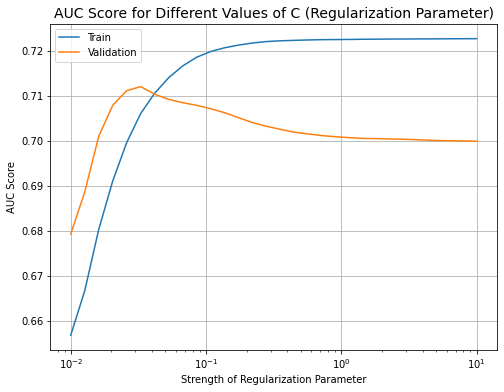

In [ ]:
#plotting regularization strength vs. AUC score for train, val, and test
plt.figure(figsize=(8, 6))
plt.semilogx(C_range_log, auc_train, label='Train')
plt.semilogx(C_range_log, auc_val, label='Validation')
#plt.semilogx(C_range_log, auc_test, label='Test')
plt.xlabel("Strength of Regularization Parameter")
plt.ylabel("AUC Score")
plt.title("AUC Score for Different Values of C (Regularization Parameter)", size=14)
plt.grid()
plt.legend()
plt.show()

DIMENSIONALITY REDUCTION

In [ ]:
cont = ['OBSERVED_DURATION_MINUTES', 'STOP_DURATION_MINUTES', 'SUSPECT_REPORTED_AGE', 'SUSPECT_WEIGHT', 'SUSPECT_HEIGHT', 'STOP_FRISK_TIME']
cat = list(scaled_train2.drop(columns=cont, axis=0))

In [ ]:
groups = {'Continuous': cont, 'Categorical': cat}

In [ ]:
scaled_train2_cont = scaled_train2[cont]
scaled_train2_cat = scaled_train2[cat]

In [ ]:
df_imputed_dr = df_imputed.drop(['FRISKED_FLAG_Y', 'WEAPON_FOUND_FLAG_1.0'], axis=1)

In [ ]:
train_dr, test_dr = train_test_split(df_imputed_dr, test_size=0.2, random_state=1)

train_dr, val_dr = train_test_split(train_dr, test_size=0.25, random_state=1)

In [ ]:
train_dr[train_dr.isna().any(axis=1)]

,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,SUSPECT_REPORTED_AGE,SUSPECT_WEIGHT,SUSPECT_HEIGHT,STOP_FRISK_TIME,YEAR2_2016,YEAR2_2017,YEAR2_2018,YEAR2_2019,YEAR2_2016,STOP_LOCATION_PRECINCT_5,STOP_LOCATION_PRECINCT_6,STOP_LOCATION_PRECINCT_7.0,STOP_LOCATION_PRECINCT_9,STOP_LOCATION_PRECINCT_10,STOP_LOCATION_PRECINCT_13,STOP_LOCATION_PRECINCT_14.0,STOP_LOCATION_PRECINCT_17,STOP_LOCATION_PRECINCT_18,STOP_LOCATION_PRECINCT_19.0,STOP_LOCATION_PRECINCT_20,STOP_LOCATION_PRECINCT_22.0,STOP_LOCATION_PRECINCT_23,STOP_LOCATION_PRECINCT_24,STOP_LOCATION_PRECINCT_25,STOP_LOCATION_PRECINCT_26,STOP_LOCATION_PRECINCT_28,STOP_LOCATION_PRECINCT_30,STOP_LOCATION_PRECINCT_32,STOP_LOCATION_PRECINCT_33,STOP_LOCATION_PRECINCT_34,STOP_LOCATION_PRECINCT_40,STOP_LOCATION_PRECINCT_41,STOP_LOCATION_PRECINCT_42,STOP_LOCATION_PRECINCT_43,STOP_LOCATION_PRECINCT_44,STOP_LOCATION_PRECINCT_45.0,STOP_LOCATION_PRECINCT_46,STOP_LOCATION_PRECINCT_47,...,STOP_LOCATION_PRECINCT_75,STOP_LOCATION_PRECINCT_77,STOP_LOCATION_PRECINCT_78,STOP_LOCATION_PRECINCT_79,STOP_LOCATION_PRECINCT_81,STOP_LOCATION_PRECINCT_84,STOP_LOCATION_PRECINCT_88,LOCATION_IN_OUT_CODE_O,LOCATION_IN_OUT_CODE_S,OFFICER_IN_UNIFORM_FLAG_Y,STOP_WAS_INITIATED_Y,JURISDICTION_CODE_H,JURISDICTION_CODE_P,JURISDICTION_CODE_T,SUSPECT_SEX_M,SUSPECT_SEX_Z,SUSPECT_RACE_DESCRIPTION_BLACK,SUSPECT_RACE_DESCRIPTION_HISPANIC,SUSPECT_RACE_DESCRIPTION_WHITE,SUSPECT_BODY_BUILD_TYPE_M,SUSPECT_BODY_BUILD_TYPE_T,SUSPECT_BODY_BUILD_TYPE_U,SUSPECT_BODY_BUILD_TYPE_Z,MONTH2_2.0,MONTH2_3.0,MONTH2_4.0,MONTH2_5.0,MONTH2_6.0,MONTH2_7.0,MONTH2_8.0,MONTH2_9.0,MONTH2_10.0,MONTH2_11.0,MONTH2_12.0,DAY2_1.0,DAY2_2.0,DAY2_3.0,DAY2_4.0,DAY2_5.0,DAY2_6.0


In [ ]:
train_dr[train_dr.isna().any(axis=1)]

,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,SUSPECT_REPORTED_AGE,SUSPECT_WEIGHT,SUSPECT_HEIGHT,STOP_FRISK_TIME,YEAR2_2016,YEAR2_2017,YEAR2_2018,YEAR2_2019,YEAR2_2016,STOP_LOCATION_PRECINCT_5,STOP_LOCATION_PRECINCT_6,STOP_LOCATION_PRECINCT_7.0,STOP_LOCATION_PRECINCT_9,STOP_LOCATION_PRECINCT_10,STOP_LOCATION_PRECINCT_13,STOP_LOCATION_PRECINCT_14.0,STOP_LOCATION_PRECINCT_17,STOP_LOCATION_PRECINCT_18,STOP_LOCATION_PRECINCT_19.0,STOP_LOCATION_PRECINCT_20,STOP_LOCATION_PRECINCT_22.0,STOP_LOCATION_PRECINCT_23,STOP_LOCATION_PRECINCT_24,STOP_LOCATION_PRECINCT_25,STOP_LOCATION_PRECINCT_26,STOP_LOCATION_PRECINCT_28,STOP_LOCATION_PRECINCT_30,STOP_LOCATION_PRECINCT_32,STOP_LOCATION_PRECINCT_33,STOP_LOCATION_PRECINCT_34,STOP_LOCATION_PRECINCT_40,STOP_LOCATION_PRECINCT_41,STOP_LOCATION_PRECINCT_42,STOP_LOCATION_PRECINCT_43,STOP_LOCATION_PRECINCT_44,STOP_LOCATION_PRECINCT_45.0,STOP_LOCATION_PRECINCT_46,STOP_LOCATION_PRECINCT_47,...,STOP_LOCATION_PRECINCT_75,STOP_LOCATION_PRECINCT_77,STOP_LOCATION_PRECINCT_78,STOP_LOCATION_PRECINCT_79,STOP_LOCATION_PRECINCT_81,STOP_LOCATION_PRECINCT_84,STOP_LOCATION_PRECINCT_88,LOCATION_IN_OUT_CODE_O,LOCATION_IN_OUT_CODE_S,OFFICER_IN_UNIFORM_FLAG_Y,STOP_WAS_INITIATED_Y,JURISDICTION_CODE_H,JURISDICTION_CODE_P,JURISDICTION_CODE_T,SUSPECT_SEX_M,SUSPECT_SEX_Z,SUSPECT_RACE_DESCRIPTION_BLACK,SUSPECT_RACE_DESCRIPTION_HISPANIC,SUSPECT_RACE_DESCRIPTION_WHITE,SUSPECT_BODY_BUILD_TYPE_M,SUSPECT_BODY_BUILD_TYPE_T,SUSPECT_BODY_BUILD_TYPE_U,SUSPECT_BODY_BUILD_TYPE_Z,MONTH2_2.0,MONTH2_3.0,MONTH2_4.0,MONTH2_5.0,MONTH2_6.0,MONTH2_7.0,MONTH2_8.0,MONTH2_9.0,MONTH2_10.0,MONTH2_11.0,MONTH2_12.0,DAY2_1.0,DAY2_2.0,DAY2_3.0,DAY2_4.0,DAY2_5.0,DAY2_6.0


In [ ]:
train_dr_cat = train_dr[cat]
train_dr_cat.shape

(7818, 224)

In [ ]:
train_dr_cat.replace([np.inf, -np.inf], np.nan, inplace=True)
train_dr_cat.dropna(how="all", inplace=True)
train_dr_cat.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(7818, 224)

In [ ]:
# from prince import FAMD
# famd = FAMD(n_components = 2, n_iter = 3, random_state = 101)

# famd.fit(train_dr)
# famd.transform(train_dr)
# famd.plot_row_coordinates(house_df,figsize=(15, 10),color_labels=['House Style : {}'.format(t) for t in house_df['HouseStyle']] )

In [ ]:
# mca = prince.MCA(n_components=2, n_iter=3, copy=True, check_input=True, engine='auto', random_state=42)
# mca = mca.fit(train_dr_cat)

In [ ]:
from sklearn.decomposition import PCA

n_components = np.linspace(1, train_dr.shape[1], train_dr.shape[1], dtype=int)
explained_variance_marginal = []
explained_variance_cumulative = []

for i in n_components:
  pca = PCA(n_components=i)
  pca.fit(train_dr)
  explained_variance_marginal.append(pca.explained_variance_ratio_[i-1])
  explained_variance_cumulative.append(np.sum(pca.explained_variance_ratio_))

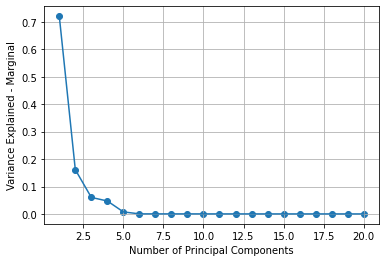

In [ ]:
plt.plot(n_components[:20], explained_variance_marginal[:20])
plt.scatter(n_components[:20], explained_variance_marginal[:20])
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance Explained - Marginal")
plt.grid()
plt.show()

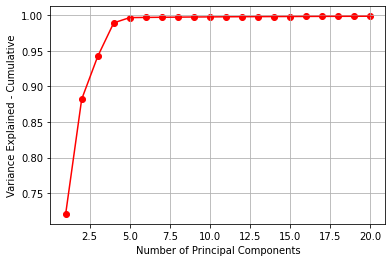

In [ ]:
plt.scatter(n_components[:20], explained_variance_cumulative[:20], color='red')
plt.plot(n_components[:20], explained_variance_cumulative[:20], color='red')
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance Explained - Cumulative")
plt.grid()
plt.show()

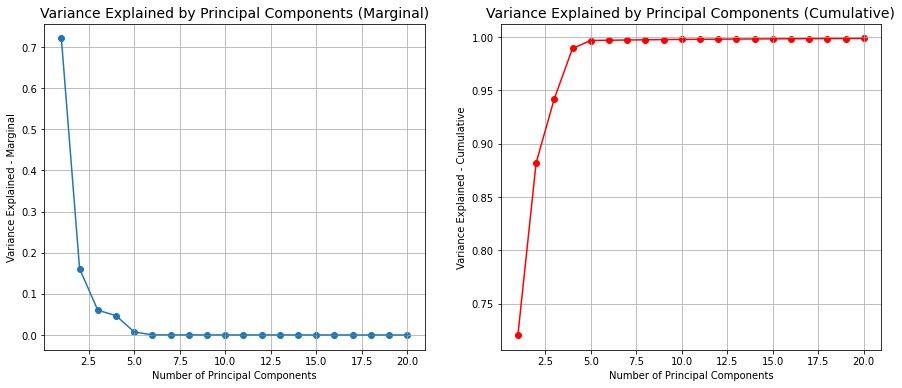

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].plot(n_components[:20], explained_variance_marginal[:20])
axes[0].scatter(n_components[:20], explained_variance_marginal[:20])
axes[0].set_xlabel("Number of Principal Components")
axes[0].set_ylabel("Variance Explained - Marginal")
axes[0].set_title("Variance Explained by Principal Components (Marginal)", size=14)
axes[0].grid()

axes[1].scatter(n_components[:20], explained_variance_cumulative[:20], color='red')
axes[1].plot(n_components[:20], explained_variance_cumulative[:20], color='red')
axes[1].set_xlabel("Number of Principal Components")
axes[1].set_ylabel("Variance Explained - Cumulative")
axes[1].set_title("Variance Explained by Principal Components (Cumulative)", size=14)
axes[1].grid()